In [1]:
import numpy as np

In [33]:
class LogisticRegression:
    def __init__(self, X, y, threshold=0.5):
        self.n = X.shape[1]
        self.d = X.shape[0]
        ones_arr = np.array([np.ones(self.n)])
        self.X = np.concatenate((np.array(X), ones_arr), axis=0).T
        self.y = y
        self.threshold = threshold
        self.W = np.random.rand(self.d+1)
        self.history = []
    
    def sigmoid(self, X):
        y = 1/(1 + np.exp(-X.dot(self.W)))
        return y
    
    def predict(self, X_pre):
        y_pre = 1/(1 + np.exp(-X_pre.dot(self.W)))
        if y_pre >= self.threshold:
            y_pre = 1
        else: y_pre = 0
        return y
    
    def loss(self):
        loss = (1/self.n)*(-1)*np.sum(self.y.dot(np.log(self.predict(self.X))) + (1-self.y).dot(np.log(1 - self.predict(self.X))))
        return loss
    
    def deviation(self):
        deviation = self.X.T.dot(self.predict(self.X) - self.y)
        return deviation
    
    def fit(self, momentum=0.9, lr=0.1, n_epochs=100):
        v = 0
        for i in range(0, n_epochs):
            v = momentum*v + lr*self.deviation()
            self.W = self.W - v
            self.history.append(self.loss())
        return self.W, np.array(self.history)

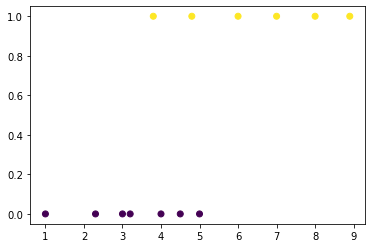

In [34]:
import matplotlib.pyplot as plt

X_train = np.array([[1, 2.3, 3, 4, 3.2, 5, 4.5, 3.8, 4.8, 6, 7, 8, 8.9]])
y_train = np.array([0, 0 , 0, 0 , 0 , 0, 0, 1, 1, 1, 1, 1, 1])
plt.scatter(X_train, y_train, c=y_train)

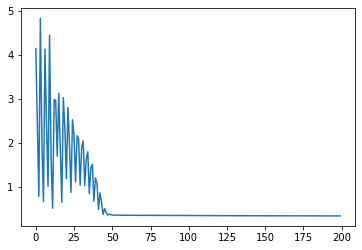

In [53]:
log = LogisticRegression(X_train, y_train)
w, history = log.fit(momentum=0.5, lr=0.1, n_epochs=200)
plt.plot(np.arange(len(history)), history)

In [54]:
n = X_train.shape[1]
d = X_train.shape[0]
ones_arr = np.array([np.ones(n)])
X_ = np.concatenate((np.array(X_train), ones_arr), axis=0).T

y_ = 1/(1 + np.exp(-X_.dot(w)))
y_ 

array([0.00158553, 0.0148318 , 0.04811152, 0.2218764 , 0.06667684,
       0.61666019, 0.4037933 , 0.16787023, 0.53229599, 0.90074747,
       0.98084252, 0.99654984, 0.99927094])

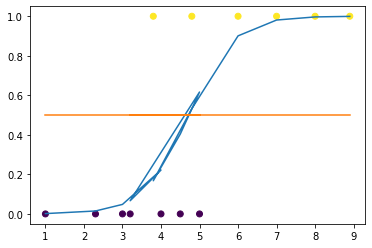

In [55]:
plt.scatter(X_train, y_train, c=y_train)
plt.plot(X_train.T, y_)
plt.plot(X_train.T, 0.5 + np.zeros(13))